<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, t


# Cargar el dataset
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [2]:
df = df.rename(columns={'species': "especie",
                         'island':"isla",
                         'bill_length_mm':"longitud_pico_mm",
                         'bill_depth_mm':"profundidad_pico_mm",
                         'flipper_length_mm':"longitud_aleta_mm",
                         'body_mass_g':"masa_corporal_g",
                         'sex':"sexo"})


## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

In [3]:
# 1. Comencemos con encontrar las diferentes especies de pingüinos presentes en el DataSet

print(f"Hay un total de {len(df.especie.unique())} especies,\ncorrespondientes a: \n{df.especie.unique()}\n")

# Cada especie posee además la siguiente información
print(f"Para cada especie se entrega {len(df.columns) - 1} datos,\ncorrespondientes a: \n{list(df.columns[1:])}\n")


Hay un total de 3 especies,
correspondientes a: 
['Adelie' 'Chinstrap' 'Gentoo']

Para cada especie se entrega 6 datos,
correspondientes a: 
['isla', 'longitud_pico_mm', 'profundidad_pico_mm', 'longitud_aleta_mm', 'masa_corporal_g', 'sexo']



In [4]:
# 2. Eliminar los pinguinos con datos NaN:
# Justo en 0_1b_pandas al explicar sobre mascara en columnas se nos enseña
# el metodo .dropna()

df1 = df.dropna().reset_index(drop=True)
df1


,especie,isla,longitud_pico_mm,profundidad_pico_mm,longitud_aleta_mm,masa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
# 3. Determinemos la isla con mayor número de pingüinos

a = df1.groupby(["isla"]).count().loc[:,["especie"]].rename(columns={"especie" : "pingüinos"})
a.head()

,pingüinos
isla,
Biscoe,163
Dream,123
Torgersen,47


In [6]:
print( 47/163 * 100 , 47/123 *100 , 47/333 *100)

28.834355828220858 38.21138211382114 14.114114114114114


La isla  Biscoe es la que posee mayor población de pingüinos, además es facil ver que hay un gran desbalance respecto a la población de Torgensen, pues represental el 14.1 % de la población total de pingüinos, la proporción respecto a Biscoe es de 0.28 y respecto a Dream es de 0.38

In [7]:
# 4. Determinemos la especie con mayor número de pingüinos

a = df1.groupby(["especie"]).count().loc[:,["isla"]].rename(columns={"isla" : "pingüinos"})
a.head()

,pingüinos
especie,
Adelie,146
Chinstrap,68
Gentoo,119


In [8]:
print( 68/146 * 100 , 68/119 *100 , 68/333 *100 )

46.57534246575342 57.14285714285714 20.42042042042042


Adelie es la especie con mayor número de individuos, correspondiente a 146 Pingüinos. La especie Chinstrap es la que mayor desbalance presenta, representando un 20 % de la población de pingüinos, su proporción respecto a Adelei es de 0.47 y respecto a Gentoo es de 0.57

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [9]:
# 5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

tamaño_picos = df1.loc[:,["longitud_pico_mm","profundidad_pico_mm"]].describe()[1:3]
tamaño_picos



,longitud_pico_mm,profundidad_pico_mm
mean,43.992793,17.164865
std,5.468668,1.969235


In [10]:
# 6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?
# el método .idxmax() nos fácilita la tarea de encontrar el indice del elemento máximo

a = df1.loc[df1['longitud_pico_mm'].idxmax()]
print("El pico más largo es de 59.6 mm correspondinete a un individuo de la especie Gentoo")
a

El pico más largo es de 59.6 mm correspondinete a un individuo de la especie Gentoo


,246
especie,Gentoo
isla,Biscoe
longitud_pico_mm,59.6
profundidad_pico_mm,17.0
longitud_aleta_mm,230.0
masa_corporal_g,6050.0
sexo,Male


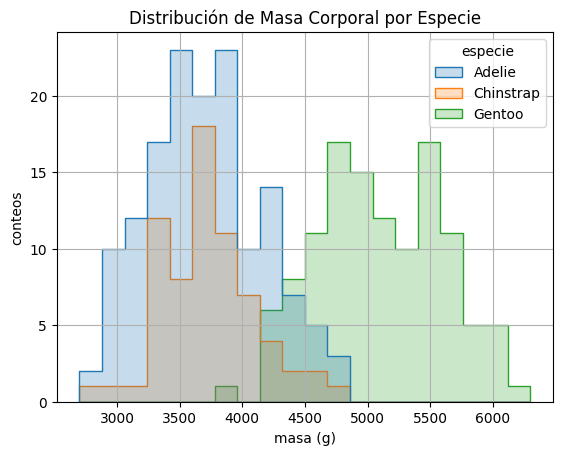

In [11]:
# 7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
sns.histplot(data=df1,x="masa_corporal_g", hue="especie",bins=20,element="step")

plt.xlabel("masa (g)")
plt.ylabel("conteos")
plt.title("Distribución de Masa Corporal por Especie")
plt.grid()
plt.show()

In [12]:
# 8. Describa la distribucion con ayuda de la media, desviacion estandard

df1.loc[:,["especie","masa_corporal_g"]].groupby(["especie"]).agg(["mean","std"])

masa_corporal_g            
                     mean         std
especie                              
Adelie        3706.164384  458.620135
Chinstrap     3733.088235  384.335081
Gentoo        5092.436975  501.476154

La media de masa entre Adelie y Chinstrap es bastante similar, 3706.2 kg y 3733.1 kg respectivamente, en cambio los individuos de Adelie poseen una distribución menos angosta, con un std de 458.6 repecto a los 384.3 de los Chinstrap. La especie Gentoo es la que posee mayor media (5092.4 kg) y su distribución es la más ancha con una desviación de 501.47

In [13]:
# 9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

masa_sexo = df1.loc[:,["masa_corporal_g","sexo"]]
estadistic_ms = masa_sexo.groupby(["sexo"]).describe()

print(f"diferencia en la media: {estadistic_ms.loc["Male",('masa_corporal_g',  'mean')] - estadistic_ms.loc["Female",('masa_corporal_g',  'mean')]}")
print(f"diferencia en la desviación estandar: {estadistic_ms.loc['Male',('masa_corporal_g',  'std')] - estadistic_ms.loc['Female',('masa_corporal_g',  'std')]}")



diferencia en la media: 683.4117965367964
diferencia en la desviación estandar: 121.45683464202978


In [14]:
# 10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

aleta_especie = df1.loc[:,["especie","longitud_aleta_mm"]]
estadistic_al = aleta_especie.groupby(["especie"]).agg(["mean","std"])
estadistic_al.head()



longitud_aleta_mm          
                       mean       std
especie                              
Adelie           190.102740  6.521825
Chinstrap        195.823529  7.131894
Gentoo           217.235294  6.585431

In [15]:
# 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?
estadistic_al = aleta_especie.groupby(["especie"]).agg(["min","max"])
estadistic_al.head()

longitud_aleta_mm       
                        min    max
especie                           
Adelie                172.0  210.0
Chinstrap             178.0  212.0
Gentoo                203.0  231.0

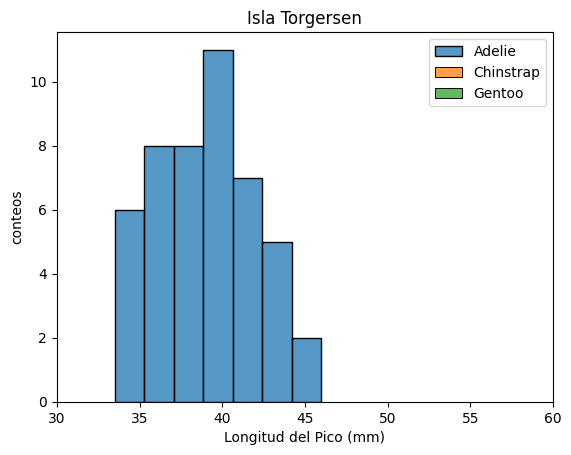

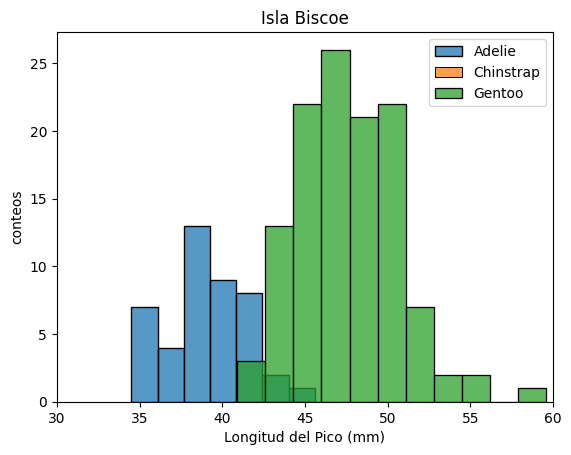

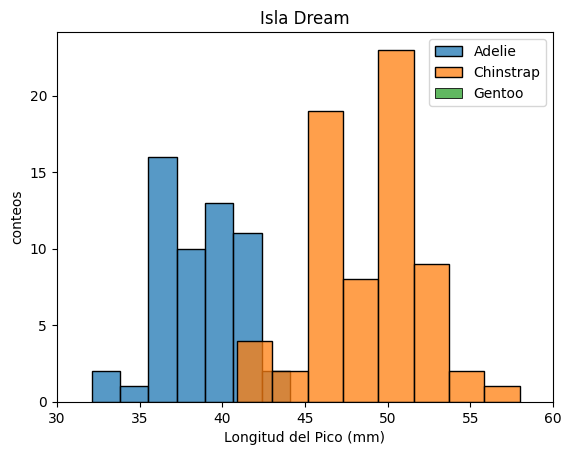

In [16]:
# 12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

for i in df1.isla.unique():

  for j in df1.especie.unique():

    a = df1[ df1["isla"] == f"{i}"]
    a = a[a["especie"] == f"{j}"]

    sns.histplot(data=a , x = "longitud_pico_mm",label=f"{j}")

  plt.title(f"Isla {i}")
  plt.xlabel("Longitud del Pico (mm)")
  plt.ylabel("conteos")
  plt.legend()
  plt.xlim(30,60)
  plt.show()

In [76]:
# 13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

std_pico = df1.groupby(["isla", "especie"]).agg(std=("longitud_pico_mm", "std")).reset_index()
std_max_df = std_pico.loc[std_pico.groupby("isla")["std"].idxmax()].reset_index(drop=True)

print(f"A la isla Dream le corresponde la mayor varianza,\ncon un std: {std_max_df["std"].max()} de la especie Chinstrap")

std_max_df


A la isla Dream le corresponde la mayor varianza,
con un std: 3.339255895935887 de la especie Chinstrap


,isla,especie,std
0,Biscoe,Gentoo,3.106116
1,Dream,Chinstrap,3.339256
2,Torgersen,Adelie,3.028097


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

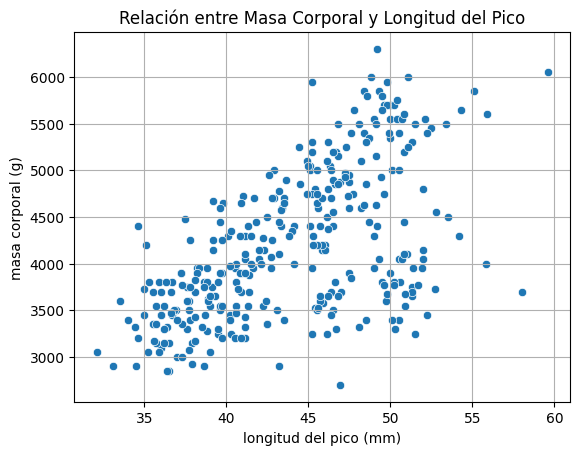

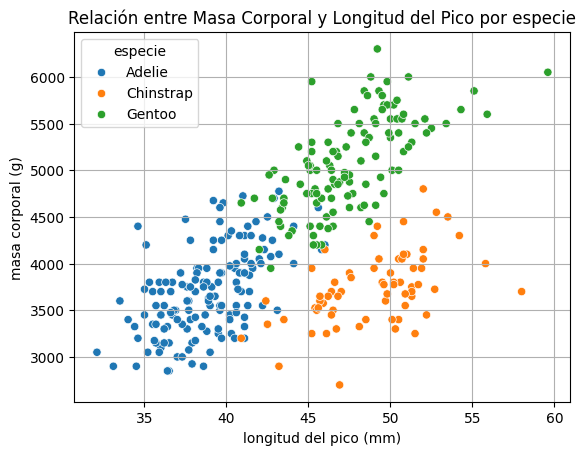

In [18]:
# 14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?
# ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

sns.scatterplot(data=df1,x="longitud_pico_mm",y="masa_corporal_g")
plt.ylabel("masa corporal (g)")
plt.xlabel("longitud del pico (mm)")
plt.title("Relación entre Masa Corporal y Longitud del Pico")
plt.grid()
plt.show()

sns.scatterplot(data=df1,x="longitud_pico_mm",y="masa_corporal_g",hue="especie")
plt.ylabel("masa corporal (g)")
plt.xlabel("longitud del pico (mm)")
plt.title("Relación entre Masa Corporal y Longitud del Pico por especie")
plt.grid()
plt.show()

la pendiente de la relación masa corporal vs longitud pico es: 86.79175964755545
su coeficiente de correlación r esta dado por: 0.589451110176949
y su p-value es 1.5386135144859823e-32 < 0.5 , por lo que la hipotesis de r=0 se refuta. 
--------------------
Para la especie Adelie
la pendiente de la relación masa corporal vs longitud pico es: 93.74912756637062
su coeficiente de correlación r esta dado por: 0.5442764102182445
y su p-value es: 1.2419179713064302e-12  < 0.5 , por lo que la hipotesis de r=0 se refuta. 
--------------------
Para la especie Chinstrap
la pendiente de la relación masa corporal vs longitud pico es: 59.117732337551075
su coeficiente de correlación r esta dado por: 0.5136383479489104
y su p-value es: 7.480491991584475e-06  < 0.5 , por lo que la hipotesis de r=0 se refuta. 
--------------------
Para la especie Gentoo
la pendiente de la relación masa corporal vs longitud pico es: 107.64225816742652
su coeficiente de correlación r esta dado por: 0.6667302222195619
y s

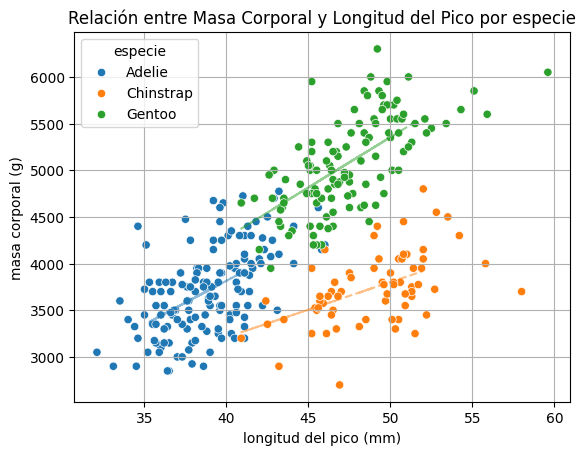

In [19]:
# 15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

y = df1["masa_corporal_g"].to_numpy()
x = df1["longitud_pico_mm"].to_numpy()

reg_xy = linregress(x,y)
print(f"la pendiente de la relación masa corporal vs longitud pico es: {reg_xy.slope}")
print(f"su coeficiente de correlación r esta dado por: {reg_xy.rvalue}")
print(f"y su p-value es {reg_xy.pvalue} < 0.5 , por lo que la hipotesis de r=0 se refuta. ")

print("-" * 20)

sns.scatterplot(data=df1,x="longitud_pico_mm",y="masa_corporal_g",hue="especie")

for i in df1.especie.unique():

  a = df1[df1["especie"] == f"{i}"]
  yi = a["masa_corporal_g"].to_numpy()
  xi = a["longitud_pico_mm"].to_numpy()

  reg_xyi = linregress(xi,yi)
  print(f"Para la especie {i}")
  print(f"la pendiente de la relación masa corporal vs longitud pico es: {reg_xyi.slope}")
  print(f"su coeficiente de correlación r esta dado por: {reg_xyi.rvalue}")
  print(f"y su p-value es: {reg_xyi.pvalue}  < 0.5 , por lo que la hipotesis de r=0 se refuta. ")
  print("-" * 20)

  plt.plot( xi[::10] , reg_xyi.slope * xi[::10] + reg_xyi.intercept , "--", alpha=0.5 )

plt.ylabel("masa corporal (g)")
plt.xlabel("longitud del pico (mm)")
plt.title("Relación entre Masa Corporal y Longitud del Pico por especie")
plt.grid()
plt.show()

La relación es ciertamente diferente al observar los datos de la especie Chitrap donde la pendiente de la regresión es de 59, aún así las tres especies poseen una correlación positiva. Dado que se paso el test de hipotesis para $r \neq 0$, podemos afirmar que exite una correlación entre la masa del pingüino y la longitud de su pico.

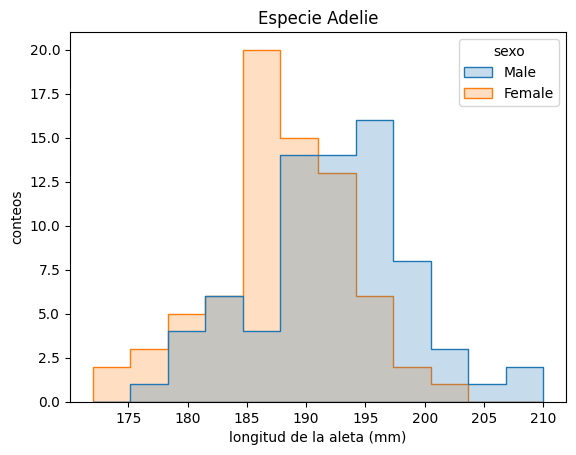

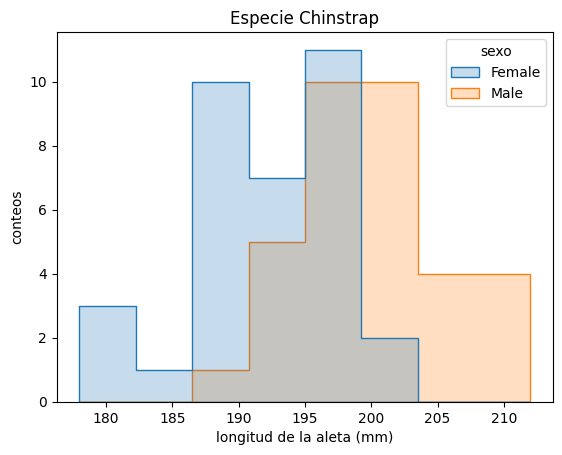

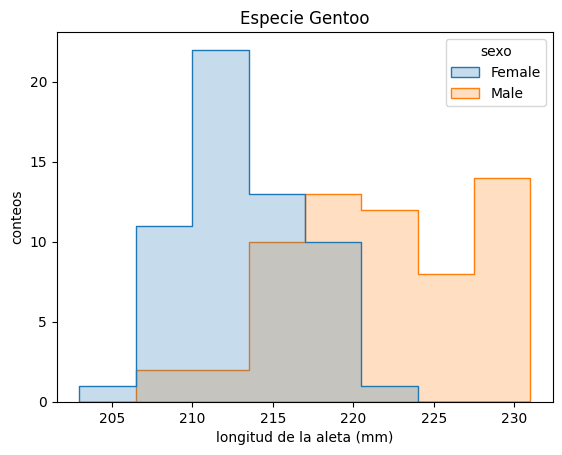

In [20]:
# 16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

for esp in df1.especie.unique():
  sns.histplot(data=df1[df1["especie"] == f"{esp}"],x="longitud_aleta_mm",hue="sexo",element="step")
  plt.title(f"Especie {esp}")
  plt.xlabel("longitud de la aleta (mm)")
  plt.ylabel("conteos")


  plt.show()


In [21]:
df1.loc[:,["sexo","especie","longitud_aleta_mm"]].groupby(["sexo","especie"]).agg(["mean","std"])

longitud_aleta_mm          
                              mean       std
sexo   especie                              
Female Adelie           187.794521  5.595035
       Chinstrap        191.735294  5.754096
       Gentoo           212.706897  3.897856
Male   Adelie           192.410959  6.599317
       Chinstrap        199.911765  5.976558
       Gentoo           221.540984  5.673252

Sin importar la especie es clara la tendencia de que la media de longitud en la aleta es mayor para los machos que para las hembras. En particular Para los gento es máxima esta diferencia, donde es de $\approx$ 8.83 mm, mientra que para los Adelie es de $\approx$ 4.6 mm.

## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

In [22]:
#Estimador de la correlacion de Pearson
def pearson_correlation(X, Y):
    """
    Calcula el coeficiente de correlación de Pearson entre dos listas o arrays de datos X e Y.

    Parámetros:
    X -- Lista o array de valores de la variable X.
    Y -- Lista o array de valores de la variable Y.

    Retorna:
    r -- Coeficiente de correlación de Pearson.
    """
    n = len(X)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    sum_XY = np.sum(X * Y)
    numerador = sum_XY - n * mean_X * mean_Y

    # Desviaciones estándar muestrales (n-1 en el denominador)
    std_X = np.std(X, ddof=1)  # ddof=1 para obtener S_x
    std_Y = np.std(Y, ddof=1)  # ddof=1 para obtener S_y

    denominador = (n - 1) * std_X * std_Y
    r = numerador / denominador
    return r

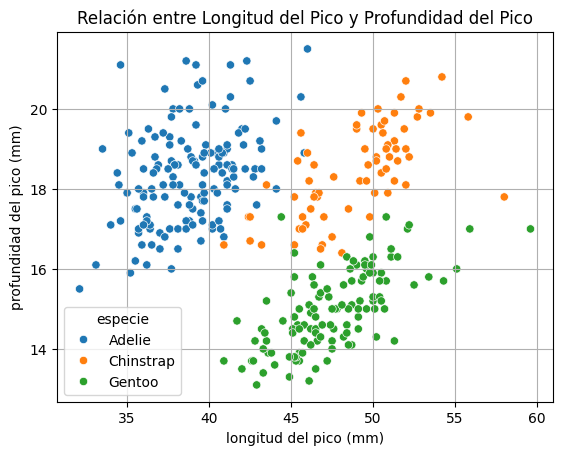

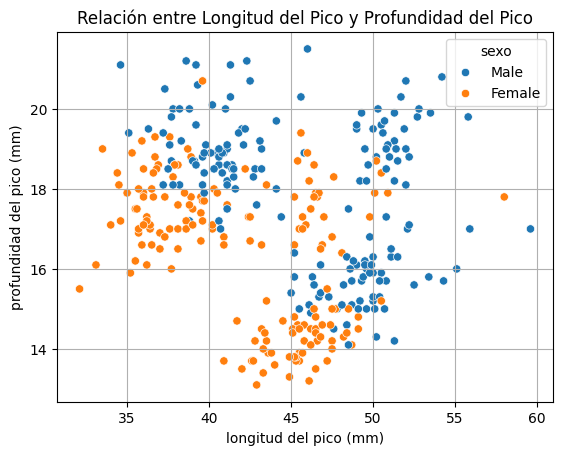

In [23]:
sns.scatterplot(data=df1 , x="longitud_pico_mm",y="profundidad_pico_mm",hue="especie")
plt.title("Relación entre Longitud del Pico y Profundidad del Pico")
plt.ylabel("profundidad del pico (mm)")
plt.xlabel("longitud del pico (mm)")
plt.grid()
plt.show()

sns.scatterplot(data=df1 , x="longitud_pico_mm",y="profundidad_pico_mm",hue="sexo")
plt.title("Relación entre Longitud del Pico y Profundidad del Pico")
plt.ylabel("profundidad del pico (mm)")
plt.xlabel("longitud del pico (mm)")
plt.grid()
plt.show()

### Longitud vs Profundidad del pico

Analicemos la relación entre la profundidad del pico y la longitud del pico de las especies. En párticular notemos como pareciese que hay una correlación positiva cuando se observa a cada especie por individual. Esta correlación parece distorcionarse para los datos como un todo.

la pendiente de la relación profundidad pico vs longitud pico es: -0.08232675339862285
su coeficiente de correlación r esta dado por: -0.22862563591302928
y su p-value es 2.528289720944277e-05. 
--------------------
El estadigrafo r es: -0.229
El estimador t es: -4.273
El intervalo es: [ -1.9672 , 1.9672]
--------------------
El estimador esta fuera del intervalo de confianza,
por lo que la hipotesis nula r=0 se rechaza.



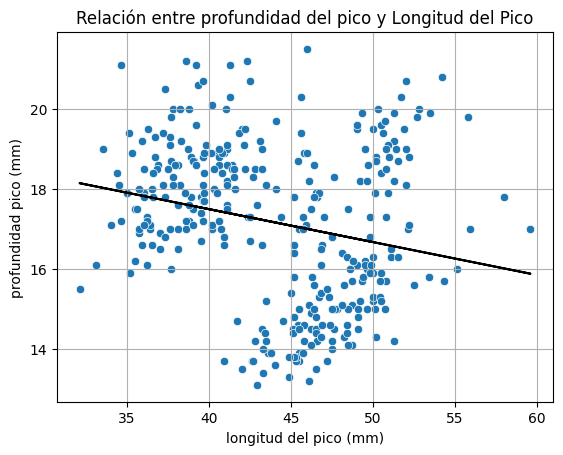

In [24]:
y = df1["profundidad_pico_mm"].to_numpy()
x = df1["longitud_pico_mm"].to_numpy()

reg_xy = linregress(x,y)
print(f"la pendiente de la relación profundidad pico vs longitud pico es: {reg_xy.slope}")
print(f"su coeficiente de correlación r esta dado por: {reg_xy.rvalue}")
print(f"y su p-value es {reg_xy.pvalue}. ")

print("-" * 20)

r = pearson_correlation(x,y)
n = len(x)
t_est = (r*np.sqrt(n-2))/(np.sqrt(1-r**2))
intervalo = t.interval(0.95, n-2, loc=0, scale=1)

print(f"El estadigrafo r es: {round(r, 3)}")
print(f'El estimador t es: {round(t_est, 3)}')
print(f'El intervalo es: [ {round(intervalo[0], 4)} , {round(intervalo[1], 4)}]')

print("-" * 20)

print(f'El estimador esta fuera del intervalo de confianza,\npor lo que la hipotesis nula r=0 se rechaza.\n')

sns.scatterplot(data=df1,x="longitud_pico_mm",y="profundidad_pico_mm")

plt.plot(x, reg_xy.slope * x + reg_xy.intercept, label="Regresión", color="black")

plt.ylabel("profundidad pico (mm)")
plt.xlabel("longitud del pico (mm)")
plt.title("Relación entre profundidad del pico y Longitud del Pico")
plt.grid()
plt.show()

Para la especie Adelie
la pendiente de la relación masa corporal vs longitud pico es: 0.17668344293376206
El estadigrafo r: 0.386
El estimador t: 5.018
El intervalo de confianza: [ -1.9672 , 1.9672]
--------------------
Para la especie Chinstrap
la pendiente de la relación masa corporal vs longitud pico es: 0.2222117240036715
El estadigrafo r: 0.654
El estimador t: 7.015
El intervalo de confianza: [ -1.9672 , 1.9672]
--------------------
Para la especie Gentoo
la pendiente de la relación masa corporal vs longitud pico es: 0.2076116034225251
El estadigrafo r: 0.654
El estimador t: 9.352
El intervalo de confianza: [ -1.9672 , 1.9672]
--------------------


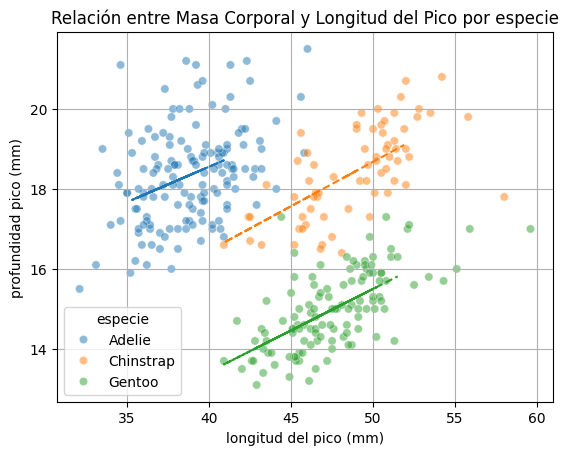

In [25]:
sns.scatterplot(data=df1,x="longitud_pico_mm",y="profundidad_pico_mm",hue="especie",alpha=0.5)

for i in df1.especie.unique():

  a = df1[df1["especie"] == f"{i}"]
  yi = a["profundidad_pico_mm"].to_numpy()
  xi = a["longitud_pico_mm"].to_numpy()

  reg_xyi = linregress(xi,yi)
  print(f"Para la especie {i}")
  print(f"la pendiente de la relación masa corporal vs longitud pico es: {reg_xyi.slope}")

  ri = pearson_correlation(xi,yi)
  ni = len(xi)
  ti_est = (ri*np.sqrt(ni-2))/(np.sqrt(1-ri**2))
  intervalo_i = t.interval(0.95, n-2, loc=0, scale=1)

  print(f"El estadigrafo r: {round(ri, 3)}")
  print(f'El estimador t: {round(ti_est, 3)}')
  print(f'El intervalo de confianza: [ {round(intervalo_i[0], 4)} , {round(intervalo_i[1], 4)}]')
  print("-" * 20)

  plt.plot( xi[::10] , reg_xyi.slope * xi[::10] + reg_xyi.intercept , "--" )

plt.ylabel("profundidad pico (mm)")
plt.xlabel("longitud del pico (mm)")
plt.title("Relación entre Masa Corporal y Longitud del Pico por especie")
plt.grid()
plt.show()

Notemos como las 3 hipotesis nulas, sobre cada una de las especies, es rechazada, por lo que para ninguna de las especies se cumple que $r=0$, es de especial importancia notar como la correlación es positiva y significativa en los tres casos, por lo que seria intuitivo concluir que a mayor longitud de picoo mayor sera la profundida de este, pero del primer análisis (los pingüinos como un todo) observamos que la hipotesis nula tambien se rechaza, por lo que $r \neq 0$, pero en este caso la correlación es negativa, es decir para los pingüinos como un todo parece que mayor longitud de pico implica una profundidad menor.

### Segunda hipotesis: pesos entre islas

Queria probar lo visto en clase, pues observe cierta diferencia en la media de las masas de los pingüinos Adelie, respecto a si viven en la isla Dream o en la Biscoe, pero al emplear el Bootstrap, el dato resulto esta justo en la media de la diferencia. Por lo que en este caso la hipotesis nula no se contradice

diferencia: 8.295454545454504


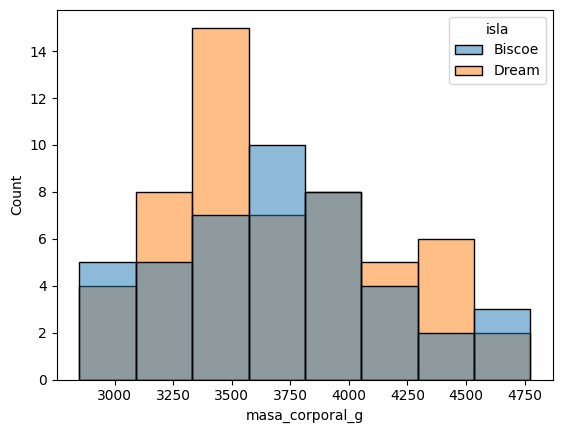

In [26]:
Adelie = df1[df1["especie"] == "Adelie"]

Adelie = Adelie[(Adelie["isla"] == "Dream") | (Adelie["isla"] == "Biscoe")].reset_index()

sns.histplot(data=Adelie , x="masa_corporal_g",hue="isla")

peso_medio = Adelie.groupby("isla")["masa_corporal_g"].mean().values

print(f"diferencia: {peso_medio[0] - peso_medio[1]}")

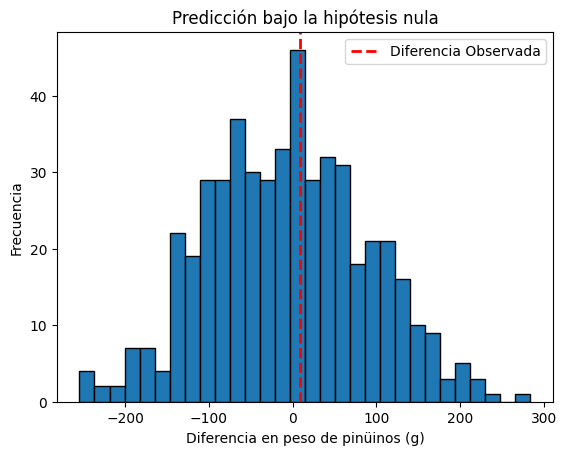

Diferencia Observada: 8.295454545454504


In [27]:
#Construyamos una funcion
def diferencia_medias(df, group_label):
    means = df.groupby(group_label)["masa_corporal_g"].mean().values
    return means[1] - means[0]

def diferentes_muestras():
    shuffled_labels = Adelie["isla"].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled_only = Adelie.copy()
    shuffled_only["Shuffled Label"] = shuffled_labels
    shuffled_only = shuffled_only[["masa_corporal_g", "Shuffled Label"]]
    return diferencia_medias(shuffled_only, "Shuffled Label")

diferencias = []

repetitions = 500
for _ in range(repetitions):
    diferencias.append(diferentes_muestras())


diferencias_df = pd.DataFrame({"Diferencia": diferencias})

# --- Graficar histograma ---
plt.hist(diferencias_df["Diferencia"], bins=30, edgecolor='black')
plt.axvline(peso_medio[0] - peso_medio[1], color='red', linestyle='dashed', linewidth=2, label="Diferencia Observada")
plt.title("Predicción bajo la hipótesis nula")
plt.xlabel("Diferencia en peso de pinüinos (g)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Mostrar la diferencia observada
print("Diferencia Observada:", peso_medio[0] - peso_medio[1])
